First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 no

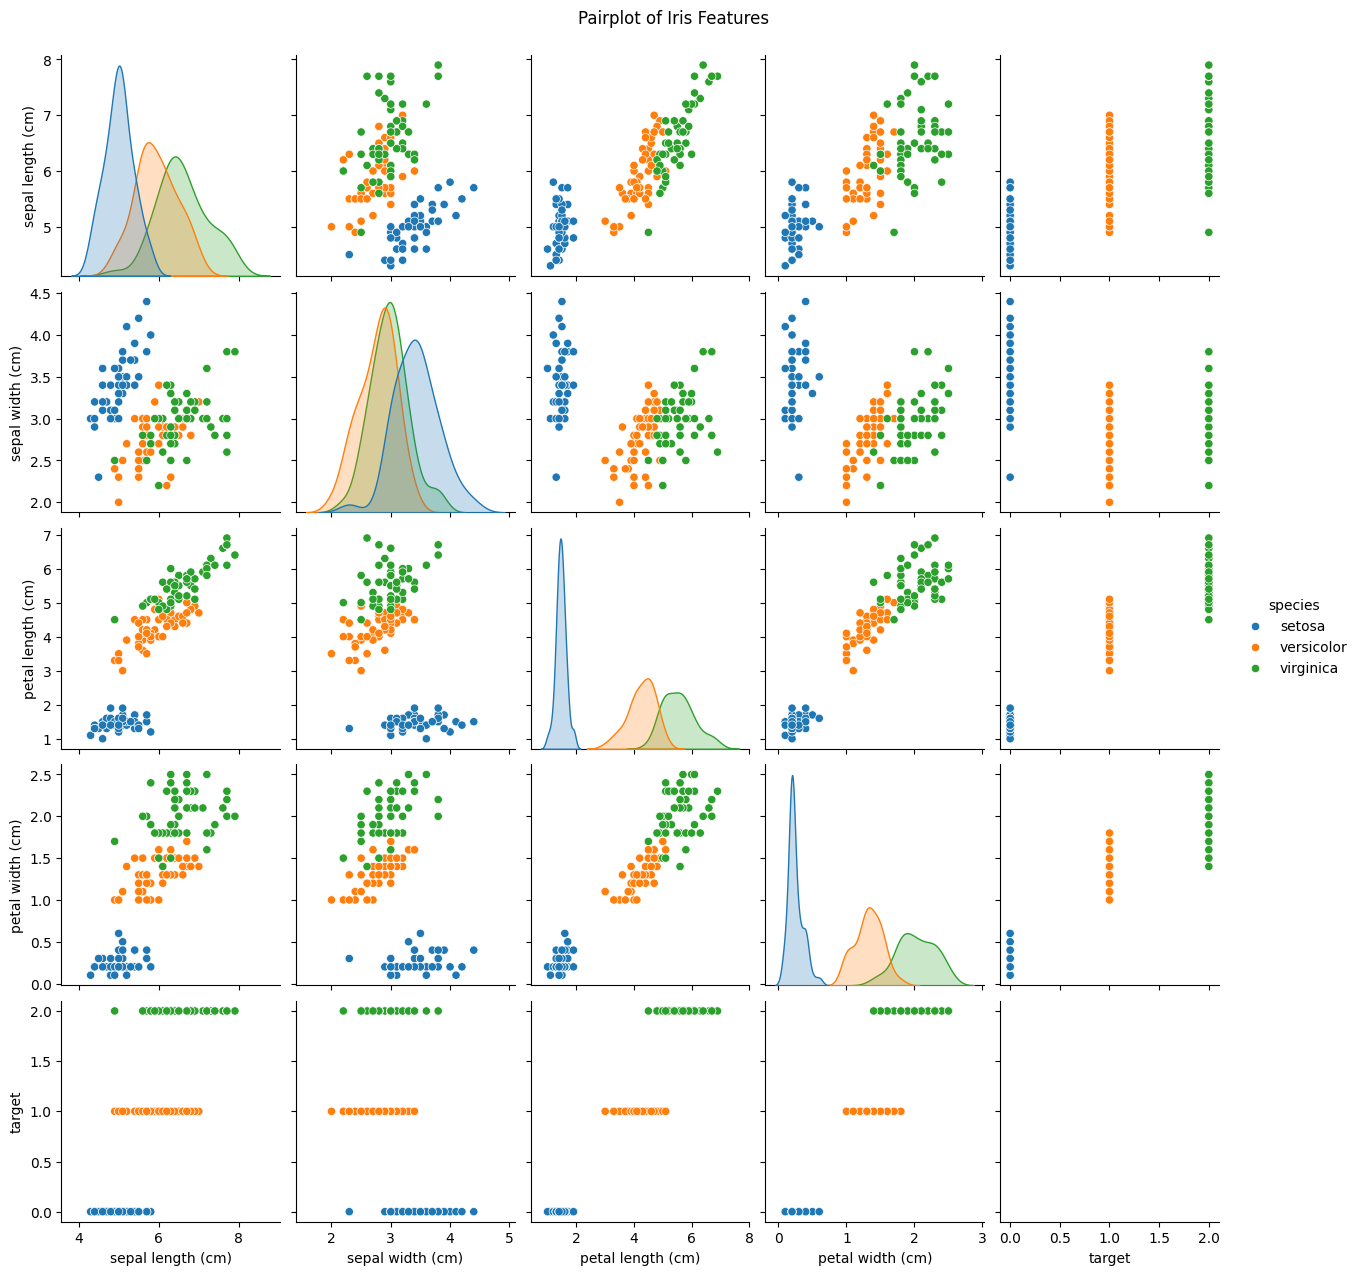

<Figure size 1000x600 with 0 Axes>

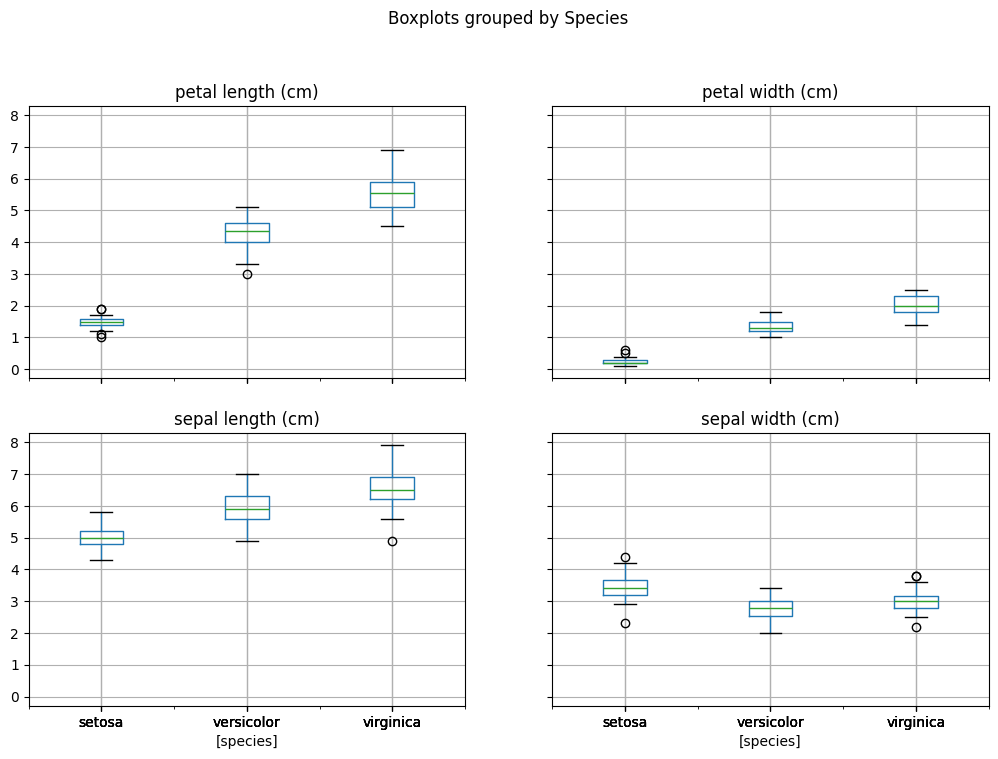

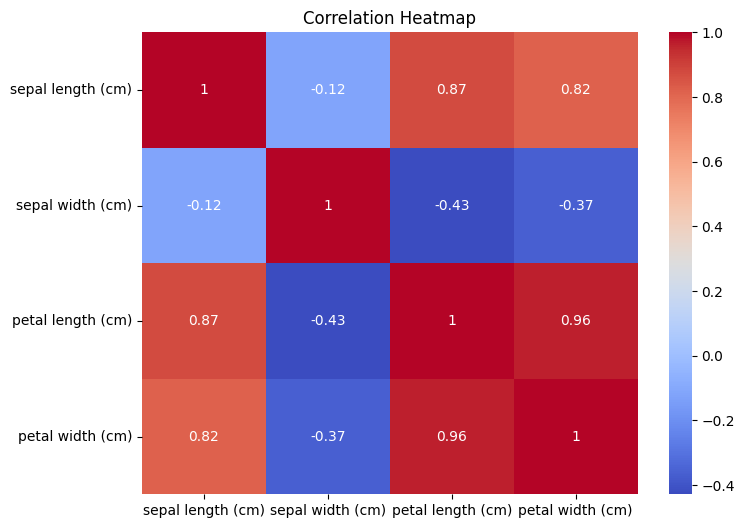

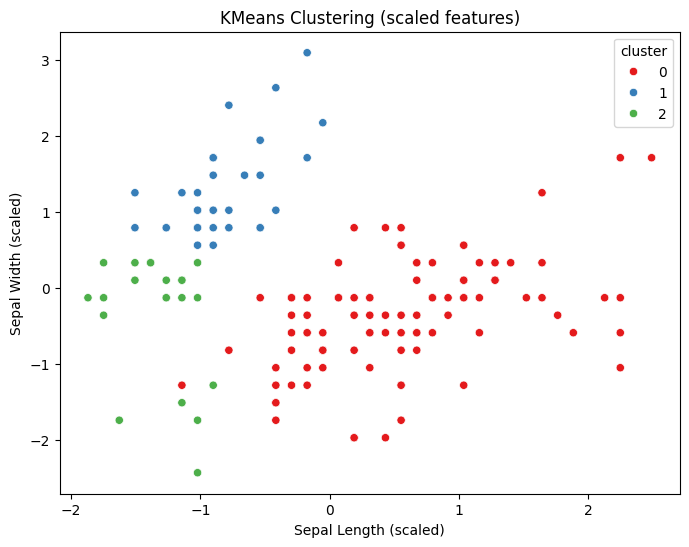


Cluster Centers (on scaled data):
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Cluster Counts:
cluster
0    96
1    33
2    21
Name: count, dtype: int64

Comparison of actual species vs clusters:
cluster      0   1   2
species               
setosa       0  33  17
versicolor  46   0   4
virginica   50   0   0


In [2]:
# Lab 4: EDA and Data Mining using Python on Iris Dataset

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Step 3: EDA - Explore Dataset
print("First 5 rows:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# Step 4: Visualizations
# Pairplot of features
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Boxplot for each feature
plt.figure(figsize=(10, 6))
df.drop(columns=['target']).boxplot(by='species', layout=(2,2), figsize=(12,8))
plt.suptitle("Boxplots grouped by Species", y=1.02)
plt.show()

# Heatmap for correlation (using only numerical columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Data Mining - KMeans Clustering
# Preprocessing: Scale features
features = df[iris.feature_names]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using first two principal features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['cluster'], palette='Set1')
plt.title("KMeans Clustering (scaled features)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()

# Step 6: Interpretation
print("\nCluster Centers (on scaled data):")
print(kmeans.cluster_centers_)

print("\nCluster Counts:")
print(df['cluster'].value_counts())

# Optional: Compare clusters with actual species
ct = pd.crosstab(df['species'], df['cluster'])
print("\nComparison of actual species vs clusters:")
print(ct)